# Important: understanding cross entropy

## Why isn't MSE well suited for classification ?

## cross-entropy is a loss function, just like MSE
you want it as small as possible

In [1]:
import pandas as pd 
import numpy as np

### First, calculate probabilities that sum to one

In [2]:
preds = {'cat':5, 'dog':4, 'horse': 2}
preds = pd.Series(preds)
preds

cat      5
dog      4
horse    2
dtype: int64

In [3]:
exp_preds = np.exp(preds)

In [4]:
exp_preds

cat      148.413159
dog       54.598150
horse      7.389056
dtype: float64

In [5]:
df = pd.DataFrame([preds, exp_preds])
df['sum'] = np.sum(df, axis=1)
df = df.T
df

,0,1
cat,5.0,148.413159
dog,4.0,54.598150
horse,2.0,7.389056
sum,11.0,210.400365


In [6]:
df['softmax'] = df[1] / df[1][3]

In [7]:
df

,0,1,softmax
cat,5.0,148.413159,0.705385
dog,4.0,54.598150,0.259496
horse,2.0,7.389056,0.035119
sum,11.0,210.400365,1.000000


### then, find a way to penalize highly the model if you don't have the right (highest) probability 

In [ ]:
# add graph of log, or ask students
# add graph of negative log
# compare with simple ratio 

In [25]:
import matplotlib.pyplot as plt

0.0


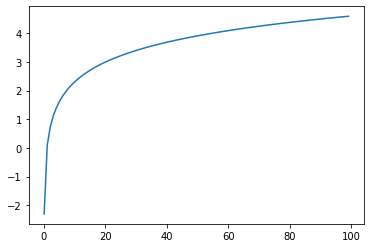

In [26]:
x = np.arange(0.1,100)
y = np.log(x)
plt.plot(x, y)
print(np.log(1))

<img src="images/cross_entropy.jpg"> </img>

In [8]:
example = pd.read_excel('excel files/entropy_example.xlsx', sheet_name='log_entropy')

In [45]:
isCat = 0
isDog = 1
PredsCat = 0.99
PredsDog = 1 - PredsCat
logPredCat = -np.log(PredsCat)
logPredDog = -np.log(PredsDog)
print(logPredCat, logPredDog)
# here, we keep logPredDog, because we were supposed to predict a dog (and we were 99% sure it was a cat...)

0.01005033585350145 4.605170185988091


In [9]:
example

,isCat,isDog,Preds,logPredCat,logPredDog,NLL,idx,idxPred
0,1,0,0.50,-0.301030,-0.30103,0.301030,1,-0.301030
1,1,0,0.98,-0.008774,-1.69897,0.008774,1,-0.008774
2,0,1,0.90,-0.045757,-1.00000,1.000000,2,-1.000000
3,0,1,0.50,-0.301030,-0.30103,0.301030,2,-0.301030
4,1,0,0.90,-0.045757,-1.00000,0.045757,1,-0.045757


<a href="https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/"> source </a>

## But, just like MSE, it doesn't suit every problem !

Can you think of a setup where neither MSE or Cross-Entropy would make sense ?

## You try to predict somebody's age using their picture. Which loss would you use and why ?

This won't work... some outputs will be put to infinity because of the .exp() :

In [17]:
def log_softmax(output):
    return (output.exp() / output.exp().sum(-1, keepdim=True)).log()

In [18]:
output.max(-1)[0].shape

torch.Size([60000])

instead we can use the log-sum-exp-trick:
https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/

In [19]:
def logsumexp(x):
    m = x.max(-1)[0]
    return m + (x-m[:, None]).exp().sum(-1).log()

def log_softmax(x):
    return x - x.logsumexp(-1, keepdim=True)

In [20]:
# negative log likelihood
def nll(output, y_train):
    # we use y_train to know which one
    # of the ten predictions we want to use
    return -output[range(y_train.shape[0]), y_train].mean()

In [21]:
# that way we get only 60000 numbers
log_softmax(output)[range(60000), y_train]

tensor([-102.8454, -304.8141,  -45.5277,  ...,   -0.7240, -160.0200,
          -5.2032])

In [22]:
# from which we take the mean, and we have our loss
nll(log_softmax(output), y_train)

tensor(170.4121)